In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
df_train=pd.read_csv('../input/bike-sharing-demand/train.csv',parse_dates=['datetime']) #parse_dates : 선택한 열을 datetime 형식으로 불러옴
df_test=pd.read_csv('../input/bike-sharing-demand/test.csv',parse_dates=['datetime'])

In [3]:
print(df_train.head())
print(df_test.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  1

In [4]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<AxesSubplot:>

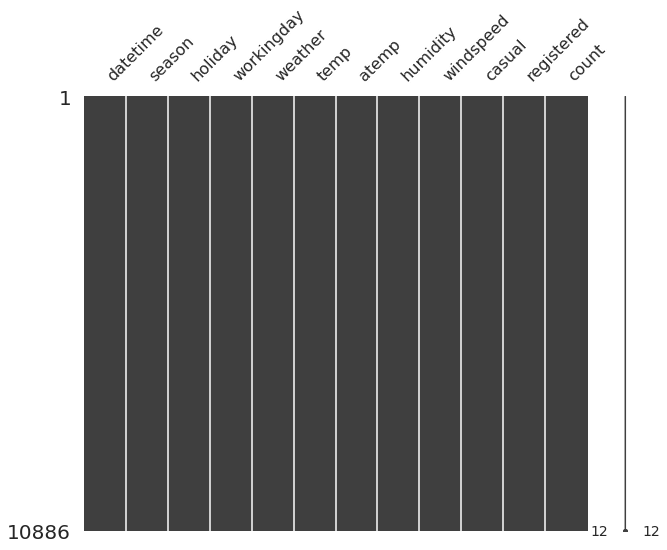

In [6]:
msno.matrix(df_train,figsize=(10,8))

In [7]:
df_train['year']=df_train['datetime'].dt.year
df_train['month']=df_train['datetime'].dt.month
df_train['hour']=df_train['datetime'].dt.hour
df_test['year']=df_test['datetime'].dt.year
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour

In [8]:
df_train['year']=df_train['year'].map({2011:0,2012:1})
df_test['year']=df_test['year'].map({2011:0,2012:1})

In [9]:
df_train.drop(['casual','registered'],axis=1,inplace=True)

<AxesSubplot:>

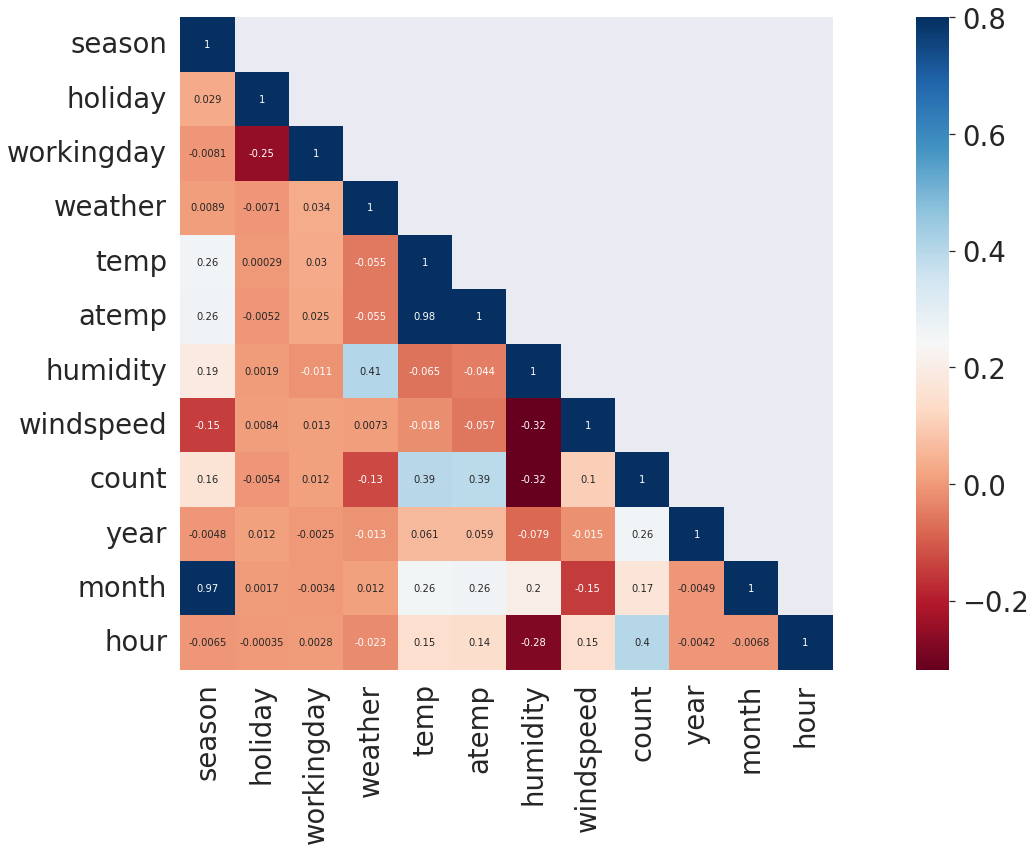

In [10]:
heatmap_data=df_train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','count','year','month','hour']].corr()
mask=np.array(heatmap_data)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(30,12)
colormap=plt.cm.RdBu
sns.heatmap(data=heatmap_data,mask=mask,vmax=.8,linecolor='white',cmap=colormap,annot=True,square=True)

In [11]:
categorialFeatures=['season','holiday','workingday','weather','month','hour']
for feat in categorialFeatures:
    df_train[feat]=df_train[feat].astype('category')
    df_test[feat]=df_test[feat].astype('category')

In [12]:
df_train.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
year                   int64
month               category
hour                category
dtype: object

Outlier

<AxesSubplot:xlabel='workingday', ylabel='count'>

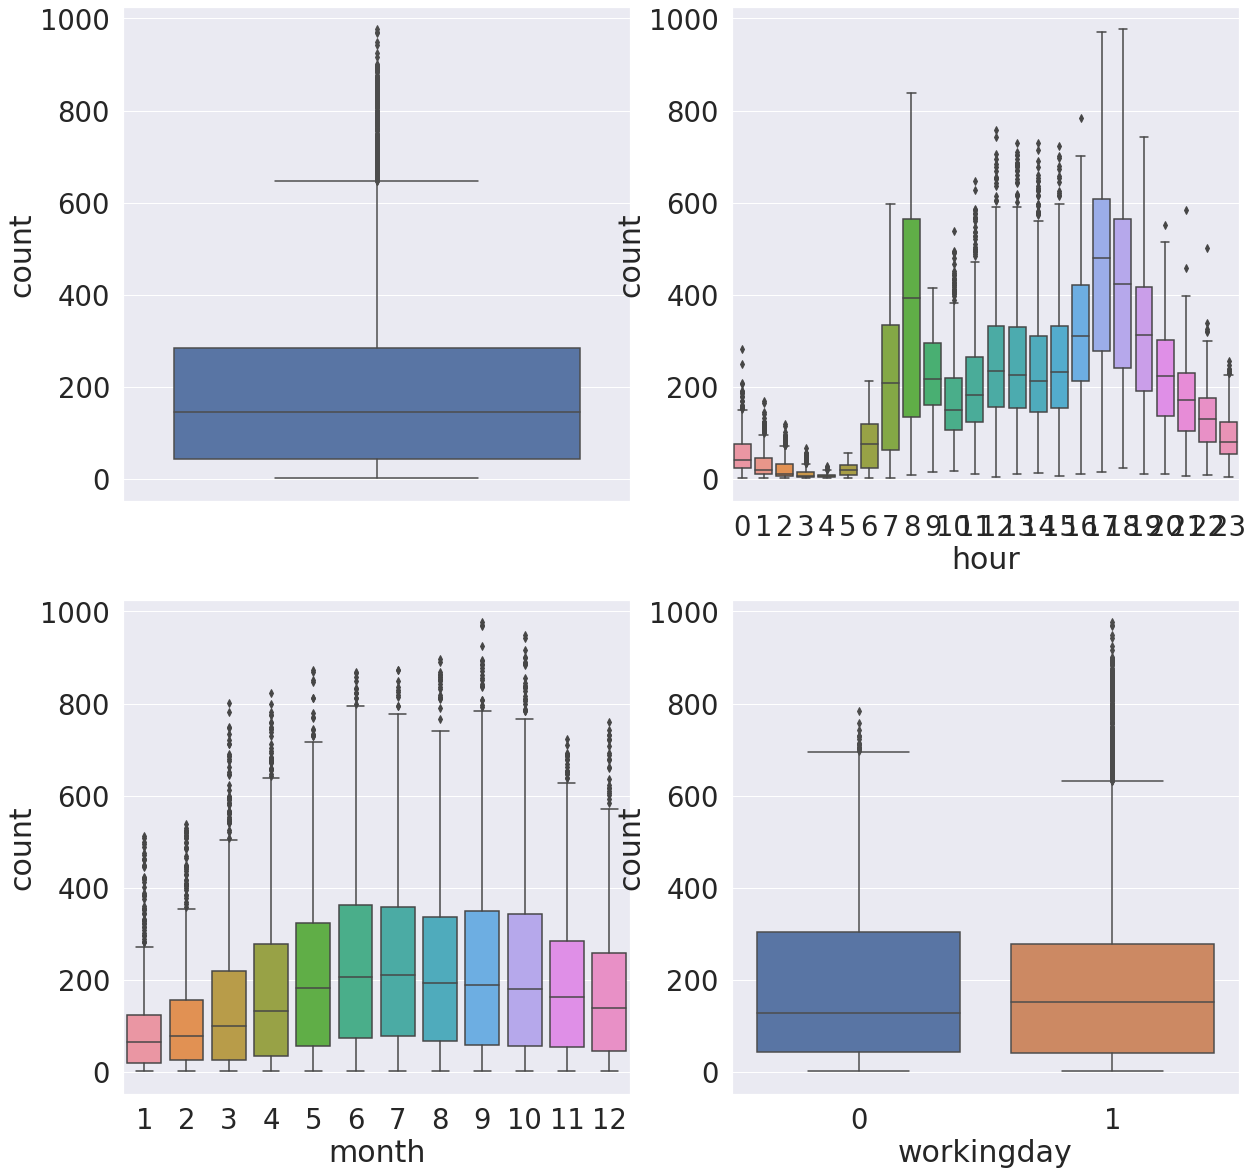

In [13]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.boxplot(y='count',data=df_train,ax=ax[0][0])
sns.boxplot(x='hour',y='count',data=df_train,ax=ax[0][1])
sns.boxplot(x='month',y='count',data=df_train,ax=ax[1][0])
sns.boxplot(x='workingday',y='count',data=df_train,ax=ax[1][1])

<AxesSubplot:xlabel='hour', ylabel='count'>

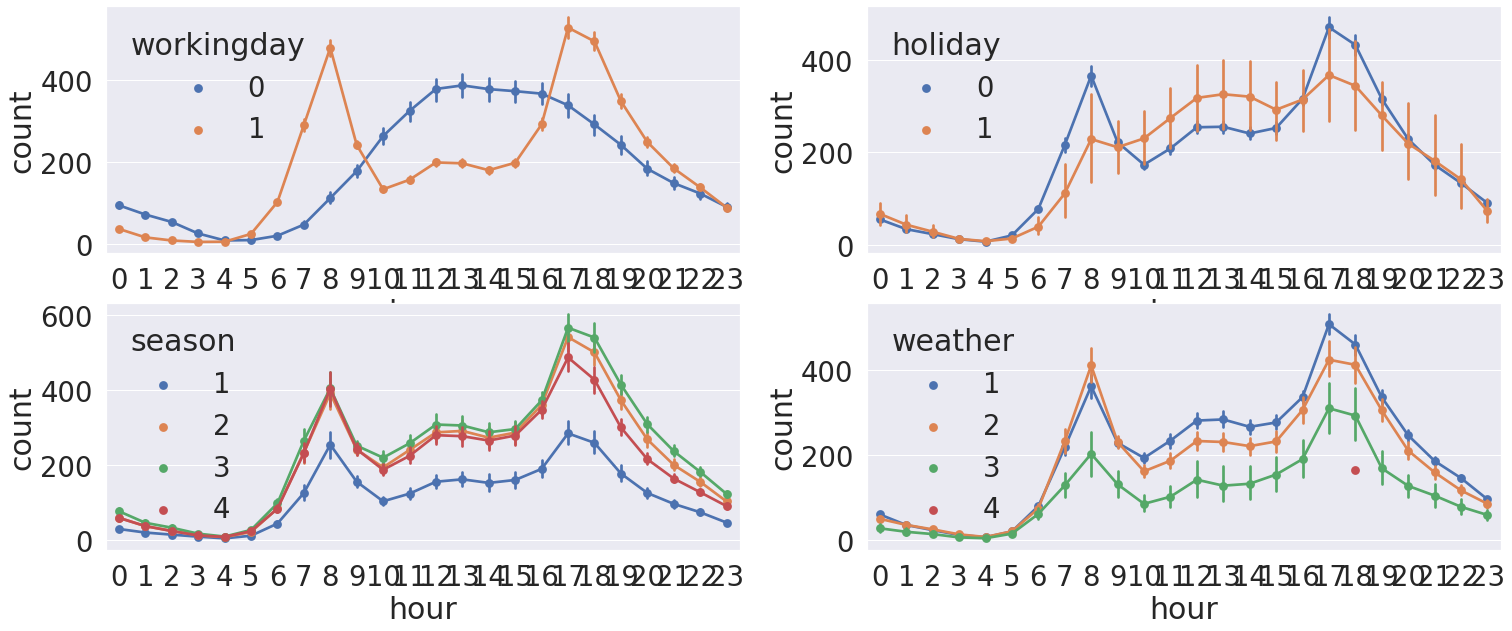

In [14]:
fig,ax=plt.subplots(2,2,figsize=(25,10))
sns.pointplot(x='hour',y='count',hue='workingday',data=df_train,ax=ax[0][0]) #dayofweek에서 토,일이 workingday가 0인날 평일이 1인날로 그래프 거의 유사
sns.pointplot(x='hour',y='count',hue='holiday',data=df_train,ax=ax[0][1]) #휴일일때는 점심시간에 많고 휴일 아닐땐 출퇴근시간에 많다.
sns.pointplot(x='hour',y='count',hue='season',data=df_train,ax=ax[1][0]) #봄에 적게 빌림
sns.pointplot(x='hour',y='count',hue='weather',data=df_train,ax=ax[1][1]) #날씨 좋을떄 많이 빌림

<AxesSubplot:xlabel='windspeed', ylabel='count'>

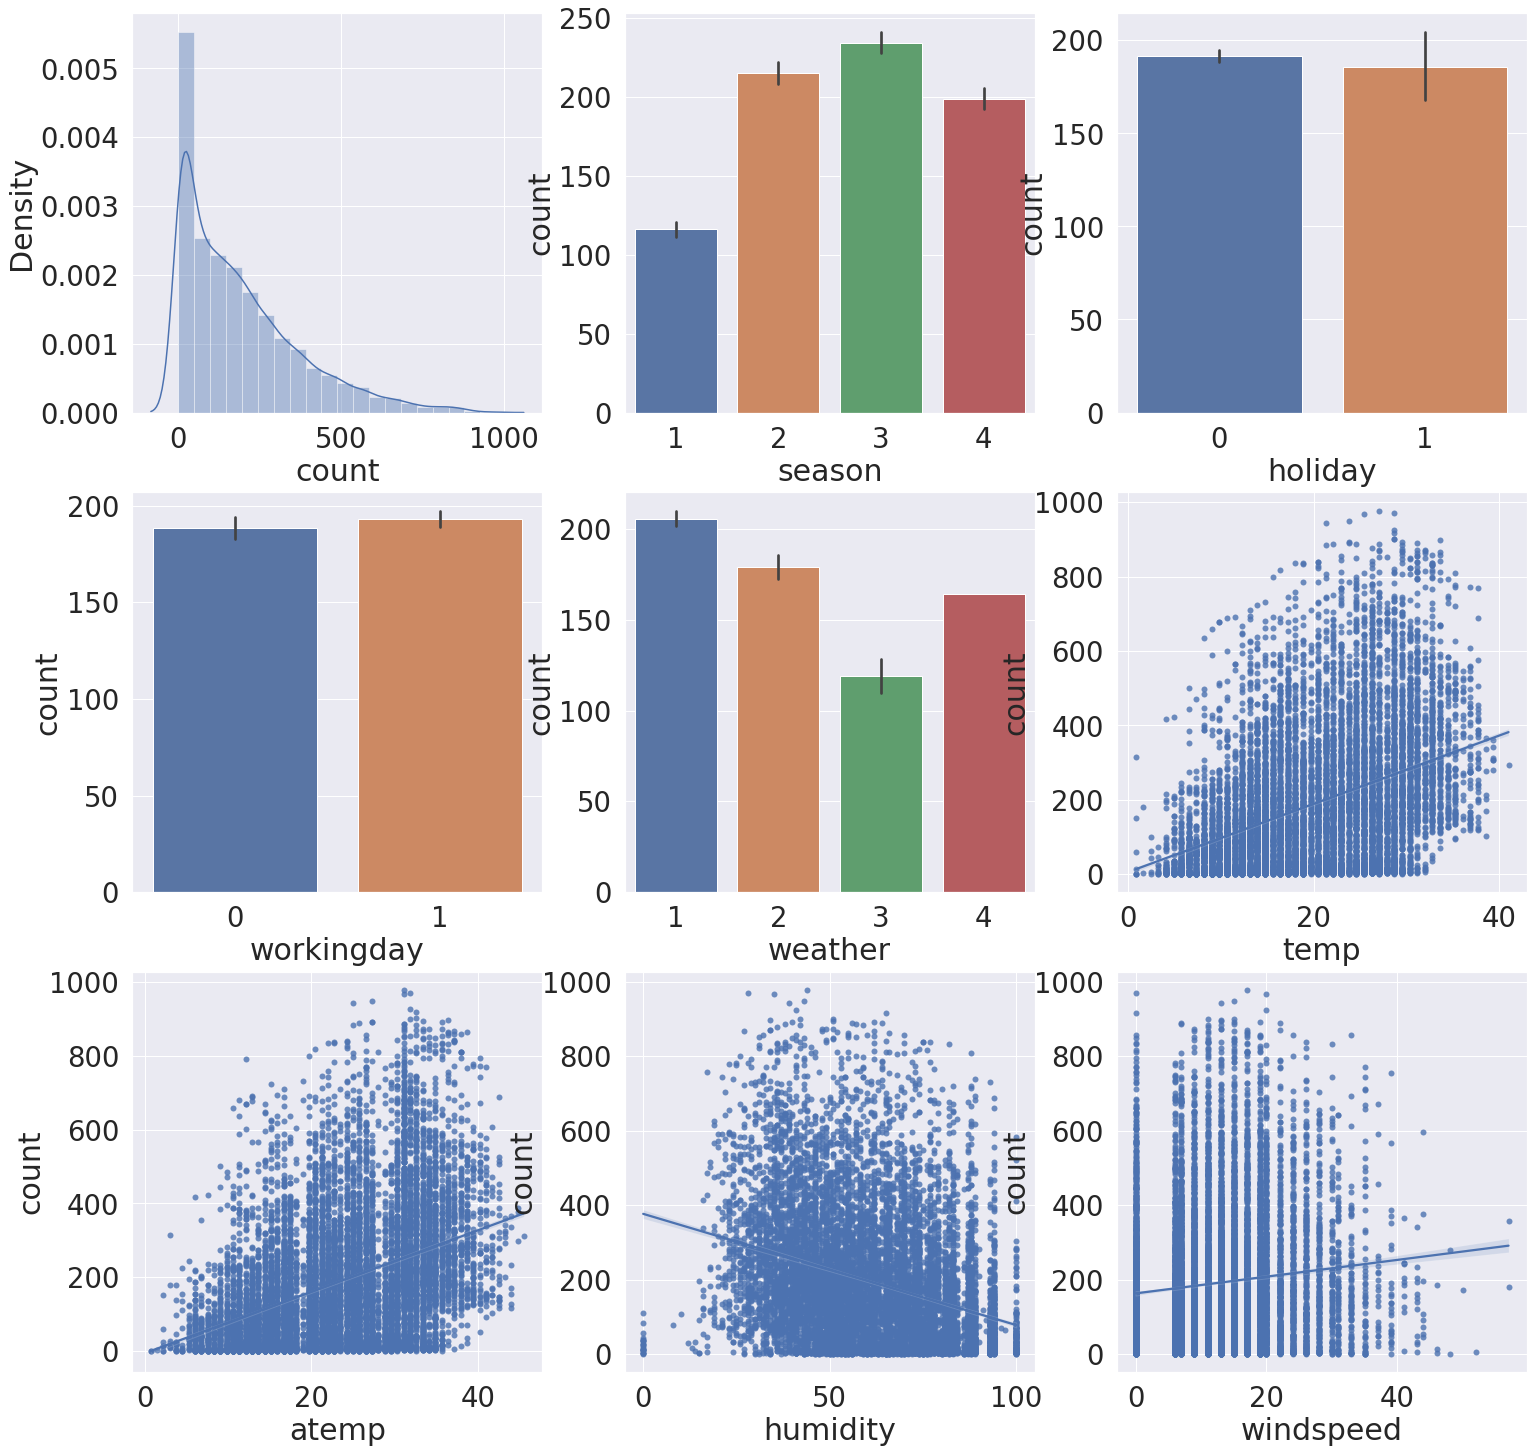

In [15]:
fig,ax=plt.subplots(3,3,figsize=(25,25))
sns.distplot(df_train['count'],bins=20,ax=ax[0][0])
sns.barplot(x='season',y='count',data=df_train,ax=ax[0][1])
sns.barplot(x='holiday',y='count',data=df_train,ax=ax[0][2])
sns.barplot(x='workingday',y='count',data=df_train,ax=ax[1][0])
sns.barplot(x='weather',y='count',data=df_train,ax=ax[1][1])
sns.regplot(x='temp',y='count',data=df_train,ax=ax[1][2])
sns.regplot(x='atemp',y='count',data=df_train,ax=ax[2][0])
sns.regplot(x='humidity',y='count',data=df_train,ax=ax[2][1])
sns.regplot(x='windspeed',y='count',data=df_train,ax=ax[2][2])
#windspeed 0인 값이 너무 많다 -> 어떻게 처리?
#humidity도 0,100 값 존재 처리?

Count-Outlier

Text(0.5, 1.0, 'windspeed')

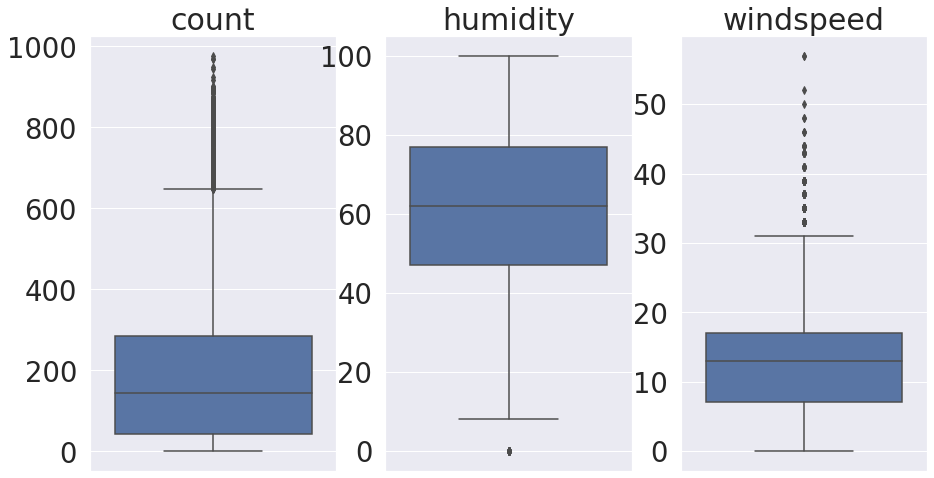

In [16]:
fig,ax=plt.subplots(1,3,figsize=(15,8))
sns.boxplot(y='count',data=df_train,ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('count')
sns.boxplot(y='humidity',data=df_train,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('humidity')
sns.boxplot(y='windspeed',data=df_train,ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('windspeed')

Windspeed 0 to meaning value

<AxesSubplot:xlabel='windspeed', ylabel='count'>

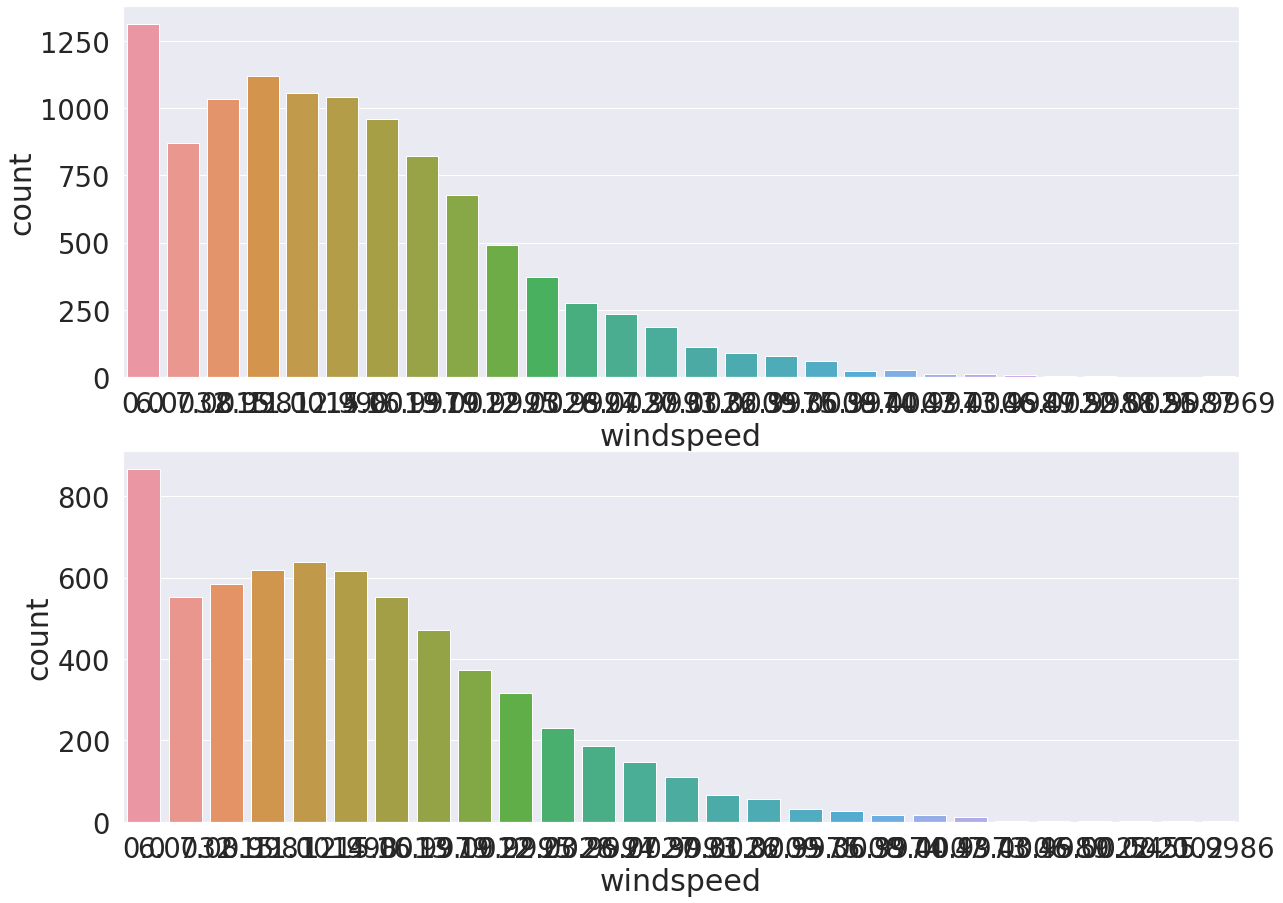

In [17]:
fig,ax=plt.subplots(2,1,figsize=(20,15))
sns.countplot('windspeed',data=df_train,ax=ax[0])
sns.countplot('windspeed',data=df_test,ax=ax[1])
#windspeed 0값이 너무 많음

In [18]:
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,0,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,0,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,0,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,1,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,1,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,1,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,1,12,22


In [19]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,1,12,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,1,12,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,1,12,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,1,12,22


In [20]:
from sklearn.ensemble import RandomForestRegressor
train=df_train.copy()
test=df_test.copy()
data=train.append(test)
data.reset_index(inplace=True) #index 라는 열 새로 생겨남
data.drop(['index'],axis=1,inplace=True)
wind0=data[data['windspeed']==0]
windNot0=data[data['windspeed']!=0]
wCol=['season','weather','humidity','month','temp','year','atemp','hour']
wrf=RandomForestRegressor()
wrf.fit(windNot0[wCol],windNot0['windspeed'])
pred=wrf.predict(wind0[wCol])
wind0['windspeed']=pred
data=windNot0.append(wind0)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [21]:
train=data[pd.notnull(data['count'])].sort_values(by=['datetime'])
test=data[~pd.notnull(data['count'])].sort_values(by=['datetime'])

In [22]:
train.reset_index(inplace=True)
train.drop(['index'],axis=1,inplace=True)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.786805,16.0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.472937,40.0,0,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.253043,32.0,0,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.137039,13.0,0,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.163661,1.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,336.0,1,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,241.0,1,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,168.0,1,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,129.0,1,12,22


In [23]:
test.reset_index(inplace=True)
test.drop(['index'],axis=1,inplace=True)
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,NaN,0,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,9.248814,NaN,0,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,8.909057,NaN,0,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,0,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,1,12,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,1,12,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,NaN,1,12,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,NaN,1,12,22


In [24]:
test.drop(['count'],axis=1,inplace=True)

without outliers

In [25]:
train=train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]
train.shape

(10739, 13)

Text(0.5, 1.0, 'test skew : 1.160')

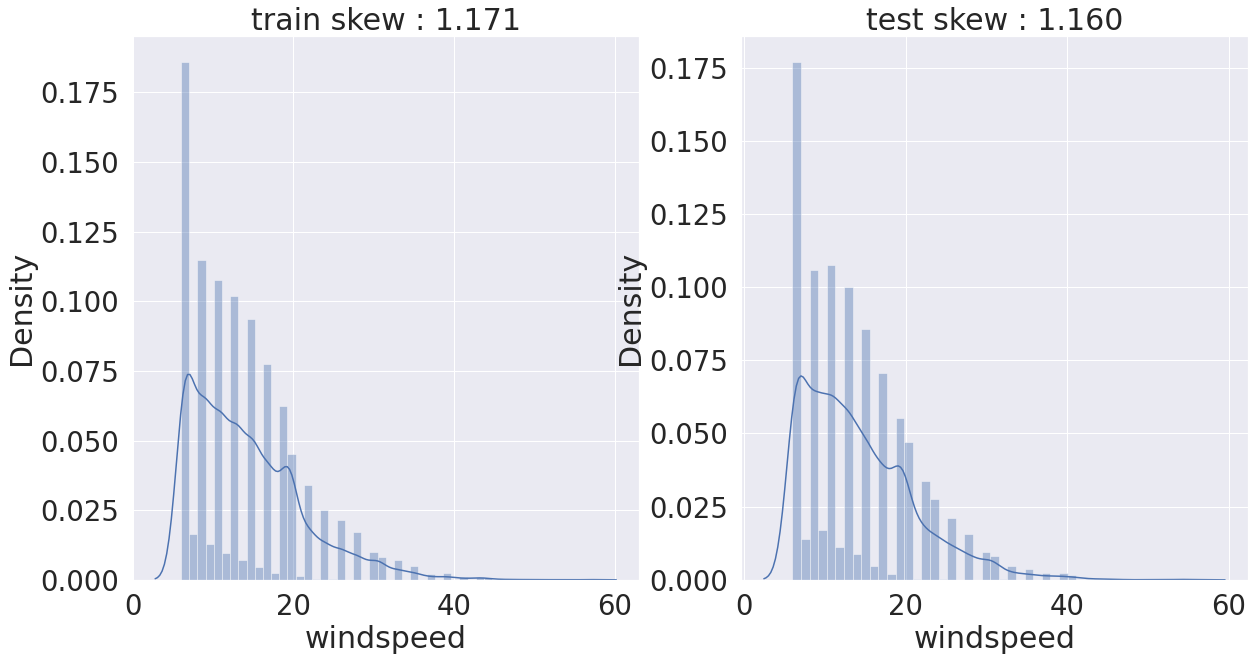

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['windspeed'],ax=ax[0])
ax[0].set_title('train skew : {:.3f}'.format(train['windspeed'].skew()))
sns.distplot(test['windspeed'],ax=ax[1])
ax[1].set_title('test skew : {:.3f}'.format(test['windspeed'].skew()))

In [27]:
#Outlier IQR
#1
'''q1,q3=np.percentile(df_train['count'],[25,75])
IQR=q3-q1
df_train=df_train[(df_train['count']>=q1-IQR*1.5) & (df_train['count']<=q3+IQR*1.5)]'''
#2.
#df_train_withoutOutlier=df_train[np.abs(df_train['count']-df_train['count'].mean())<=(3*df_train['count'].std())]
#print(df_train.shape)
#print(df_train_withoutOutlier.shape)

"q1,q3=np.percentile(df_train['count'],[25,75])\nIQR=q3-q1\ndf_train=df_train[(df_train['count']>=q1-IQR*1.5) & (df_train['count']<=q3+IQR*1.5)]"

머신러닝에는 종속변수가 정규분포일 때 가장 이상적이다. 이상치 값을 제거한 후 count 변수에 로그를 씌우는 방법이 가장 이상적이나 처리 해줘도 정규 분포를 딱히 따르진 않음

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

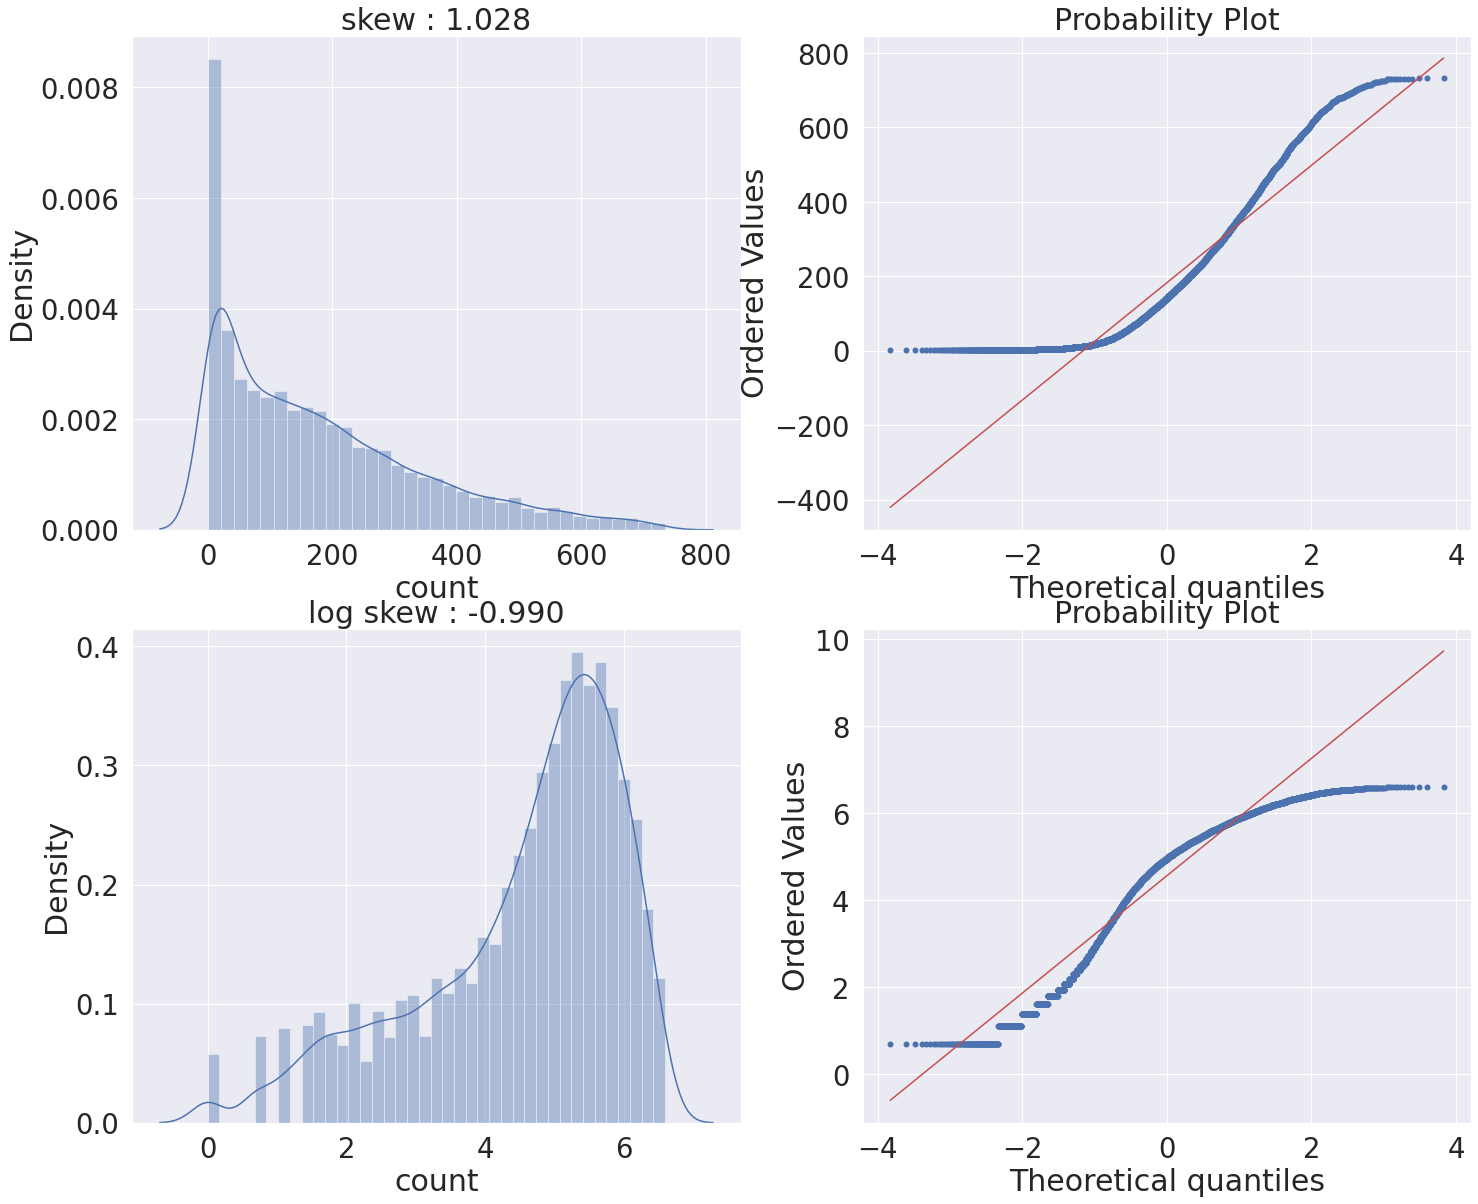

In [28]:
from scipy import stats
fig,ax=plt.subplots(2,2,figsize=(24,20))
sns.distplot(train['count'],ax=ax[0][0])
ax[0][0].set_title('skew : {:.3f}'.format(train['count'].skew()))
stats.probplot(train['count'],dist='norm',fit=True,plot=ax[0][1]) #stats.probplot() QQplot(Quantile-Quantile plot) 두 변수간의 분포 비교->주어진 데이터와 정규분포 비교해서 정규분포 가정 마땅한지 판단
sns.distplot(np.log(train['count']),ax=ax[1][0])
ax[1][0].set_title('log skew : {:.3f}'.format(np.log(train['count']).skew()))
stats.probplot(np.log1p(train['count']),dist='norm',fit=True,plot=ax[1][1])

In [29]:
print(train)
print(test)

                 datetime season holiday workingday weather   temp   atemp  \
0     2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
1     2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2     2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3     2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4     2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                   ...    ...     ...        ...     ...    ...     ...   
10881 2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882 2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883 2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
10884 2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
10885 2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  count  year month hour  
0         

In [30]:
train.drop(['datetime'],axis=1,inplace=True)
test.drop(['datetime'],axis=1,inplace=True)

RMSLE

In [31]:
def rmsle(y,y_,convertExp=True):
    if convertExp:
        y=np.exp(y)
        y_=np.exp(y_) #log씌운 값으로 훈련 시키니까 본래로 돌려놓고 rmsle점수 평가
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    cal=(log1-log2)**2
    return np.sqrt(np.mean(cal))
'''def rmsle(p,a):
    p=np.array(p)
    a=np.array(a)
    log_p=np.log(p+1)
    log_a=np.log(a+1)
    diff=log_p-log_a
    diff=np.square(diff)
    mean_diff=diff.mean()
    return np.sqrt(mean_diff)'''

'def rmsle(p,a):\n    p=np.array(p)\n    a=np.array(a)\n    log_p=np.log(p+1)\n    log_a=np.log(a+1)\n    diff=log_p-log_a\n    diff=np.square(diff)\n    mean_diff=diff.mean()\n    return np.sqrt(mean_diff)'

In [32]:
yLabels=train['count']
X_train=train.drop(['count'],axis=1)

In [33]:
rfModel = RandomForestRegressor(n_estimators=500,max_features='auto')
yLabelsLog = np.log1p(yLabels)
rfModel.fit(train.drop(['count'],axis=1),yLabelsLog)
pred = rfModel.predict(train.drop(['count'],axis=1))
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(pred),False))

RMSLE Value For Random Forest:  0.11166741692513332


<AxesSubplot:ylabel='Density'>

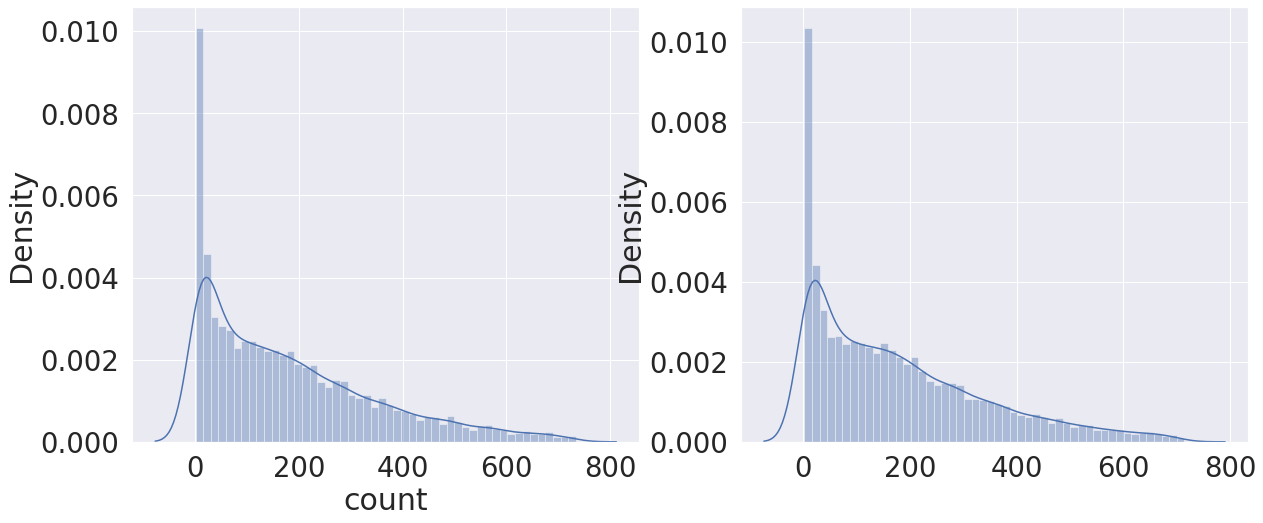

In [34]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(yLabels,bins=50,ax=ax[0])
sns.distplot(np.exp(pred),bins=50,ax=ax[1])

([<matplotlib.axis.YTick at 0x7fee46525190>,
 [Text(0, 0, 'season'),
  Text(0, 1, 'holiday'),
  Text(0, 2, 'workingday'),
  Text(0, 3, 'weather'),
  Text(0, 4, 'temp'),
  Text(0, 5, 'atemp'),
  Text(0, 6, 'humidity'),
  Text(0, 7, 'windspeed'),
  Text(0, 8, 'year'),
  Text(0, 9, 'month'),
  Text(0, 10, 'hour')])

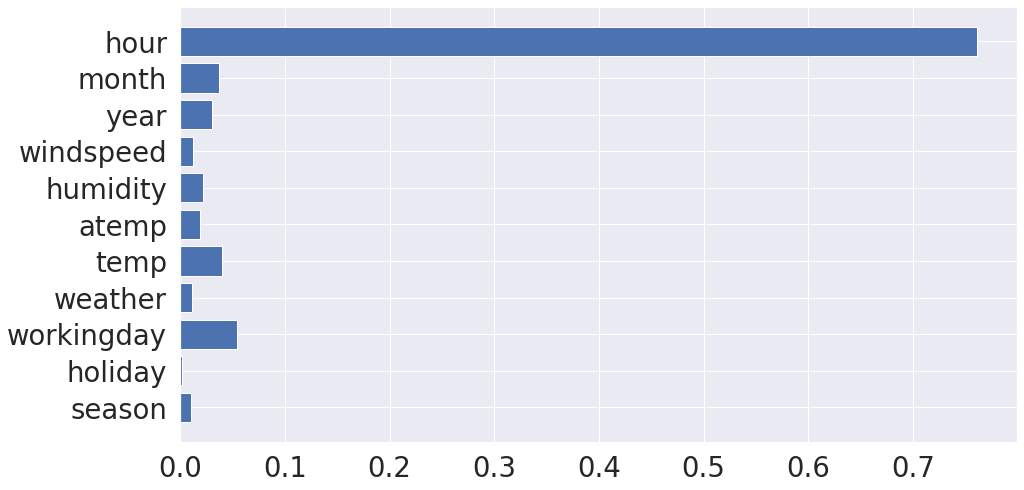

In [35]:
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(rfModel.feature_importances_)),rfModel.feature_importances_)
plt.yticks(np.arange(len(rfModel.feature_importances_)),test.columns)

In [36]:
test.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,1,10.66,11.365,56,26.002700,0,1,0
1,1,0,1,1,10.66,13.635,56,9.248814,0,1,1
2,1,0,1,1,10.66,13.635,56,8.909057,0,1,2


In [37]:
train.drop(['count'],axis=1).head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,0,1,9.84,14.395,81,6.786805,0,1,0
1,1,0,0,1,9.02,13.635,80,6.472937,0,1,1
2,1,0,0,1,9.02,13.635,80,6.253043,0,1,2


In [38]:
pred=rfModel.predict(test)
pred=np.exp(pred)

In [39]:
submission=pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')
submission['count']=pred
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.652934
1,2011-01-20 01:00:00,5.409727
2,2011-01-20 02:00:00,3.660006
3,2011-01-20 03:00:00,4.058871
4,2011-01-20 04:00:00,3.586379


In [40]:
submission.to_csv('./bike_submission_last.csv',index=False)